In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# E-Commerce Customer Segmentation

For the e-commerce customer segmentation project, I imported the necessary libraries to handle data manipulation, preprocessing, clustering, and visualization tasks. These tools were crucial for applying the k-means algorithm and evaluating the clustering results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Loading the Data

In [45]:

data=pd.read_excel("C:/Users/ELCOT/Downloads/data_prac/cust_data.xlsx")

## Exploratory Data Analysis (EDA)


# Dataset Shape and Information

The dataset consists of 30,000 rows and 38 columns, including customer information such as Cust_ID, Gender, Orders, and preferences for various brands. By using the info() function, I examined the data types and checked for any missing values, ensuring the dataset is prepared for further analysis.

In [105]:
data.shape

(30000, 38)

In [106]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
for i in data.columns:
    print(i,":",len(data[i].unique()))

Cust_ID : 30000
Gender : 3
Orders : 13
Jordan : 16
Gatorade : 13
Samsung : 20
Asus : 17
Udis : 13
Mondelez International : 13
Wrangler : 10
Vans : 16
Fila : 15
Brooks : 10
H&M : 16
Dairy Queen : 24
Fendi : 14
Hewlett Packard : 10
Pladis : 11
Asics : 25
Siemens : 11
J.M. Smucker : 27
Pop Chips : 17
Juniper : 29
Huawei : 16
Compaq : 19
IBM : 9
Burberry : 21
Mi : 9
LG : 13
Dior : 12
Scabal : 11
Tommy Hilfiger : 9
Hollister : 10
Forever 21 : 9
Colavita : 15
Microsoft : 13
Jiffy mix : 9
Kraft : 12


In [109]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [110]:
data.duplicated().sum()

np.int64(0)

### 2.Data Cleaning
I cleaned the dataset by dropping the rows where the Gender column had missing values, which accounted for 9.08% of the data. This step ensures that the analysis is based on complete and accurate information.


In [111]:
# Treating null vaules

data.isnull().mean()*100



Cust_ID                   0.00
Gender                    9.08
Orders                    0.00
Jordan                    0.00
Gatorade                  0.00
Samsung                   0.00
Asus                      0.00
Udis                      0.00
Mondelez International    0.00
Wrangler                  0.00
Vans                      0.00
Fila                      0.00
Brooks                    0.00
H&M                       0.00
Dairy Queen               0.00
Fendi                     0.00
Hewlett Packard           0.00
Pladis                    0.00
Asics                     0.00
Siemens                   0.00
J.M. Smucker              0.00
Pop Chips                 0.00
Juniper                   0.00
Huawei                    0.00
Compaq                    0.00
IBM                       0.00
Burberry                  0.00
Mi                        0.00
LG                        0.00
Dior                      0.00
Scabal                    0.00
Tommy Hilfiger            0.00
Holliste

In [112]:
data1 = data.dropna(subset=['Gender']).reset_index(drop=True)
print(data1.shape)  # Check the new shape


(27276, 38)


In [113]:
import os
file_name ='e-comm_clean_data_final'
file_path = os.path.join('C:/Users/ELCOT/Downloads/data_prac',file_name)
data1.to_csv(file_path, index=False)

### 3.Data Visualization
I used a pie chart to visualize the distribution of Gender (Male and Female) in the dataset. Additionally, a heatmap was used to visualize the confusion matrix, and boxplots were created to analyze the distribution of Order counts for both genders. I also used boxplots to explore the spread and outliers of numerical features in the dataset.

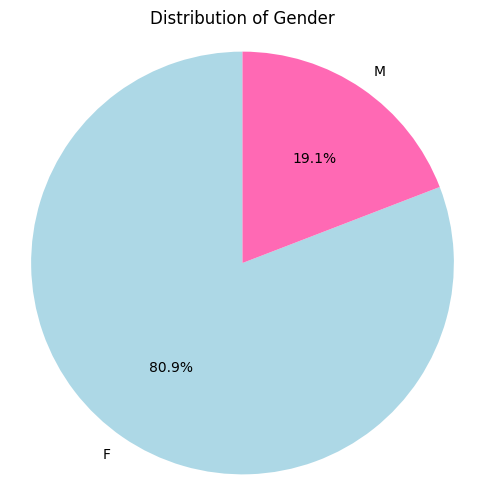

In [114]:
gender_counts = data1['Gender'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#FF69B4', '#808080'])


plt.title('Distribution of Gender')
plt.axis('equal')  

plt.show()


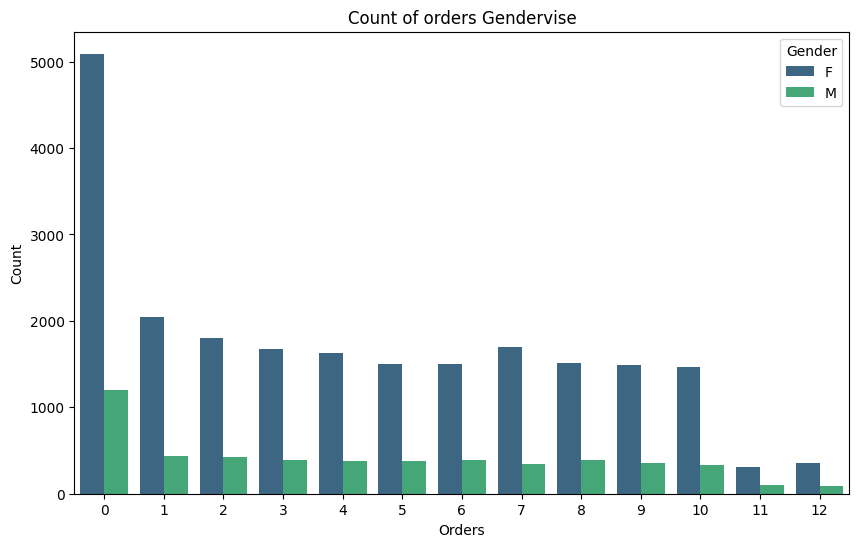

In [115]:
plt.figure(figsize=(10,6))
sns.countplot(data=data1,x='Orders',hue='Gender',palette='viridis')
plt.title('Count of orders Gendervise')
plt.xlabel('Orders')
plt.ylabel('Count')
plt.show()

In [116]:
data1.shape

(27276, 38)

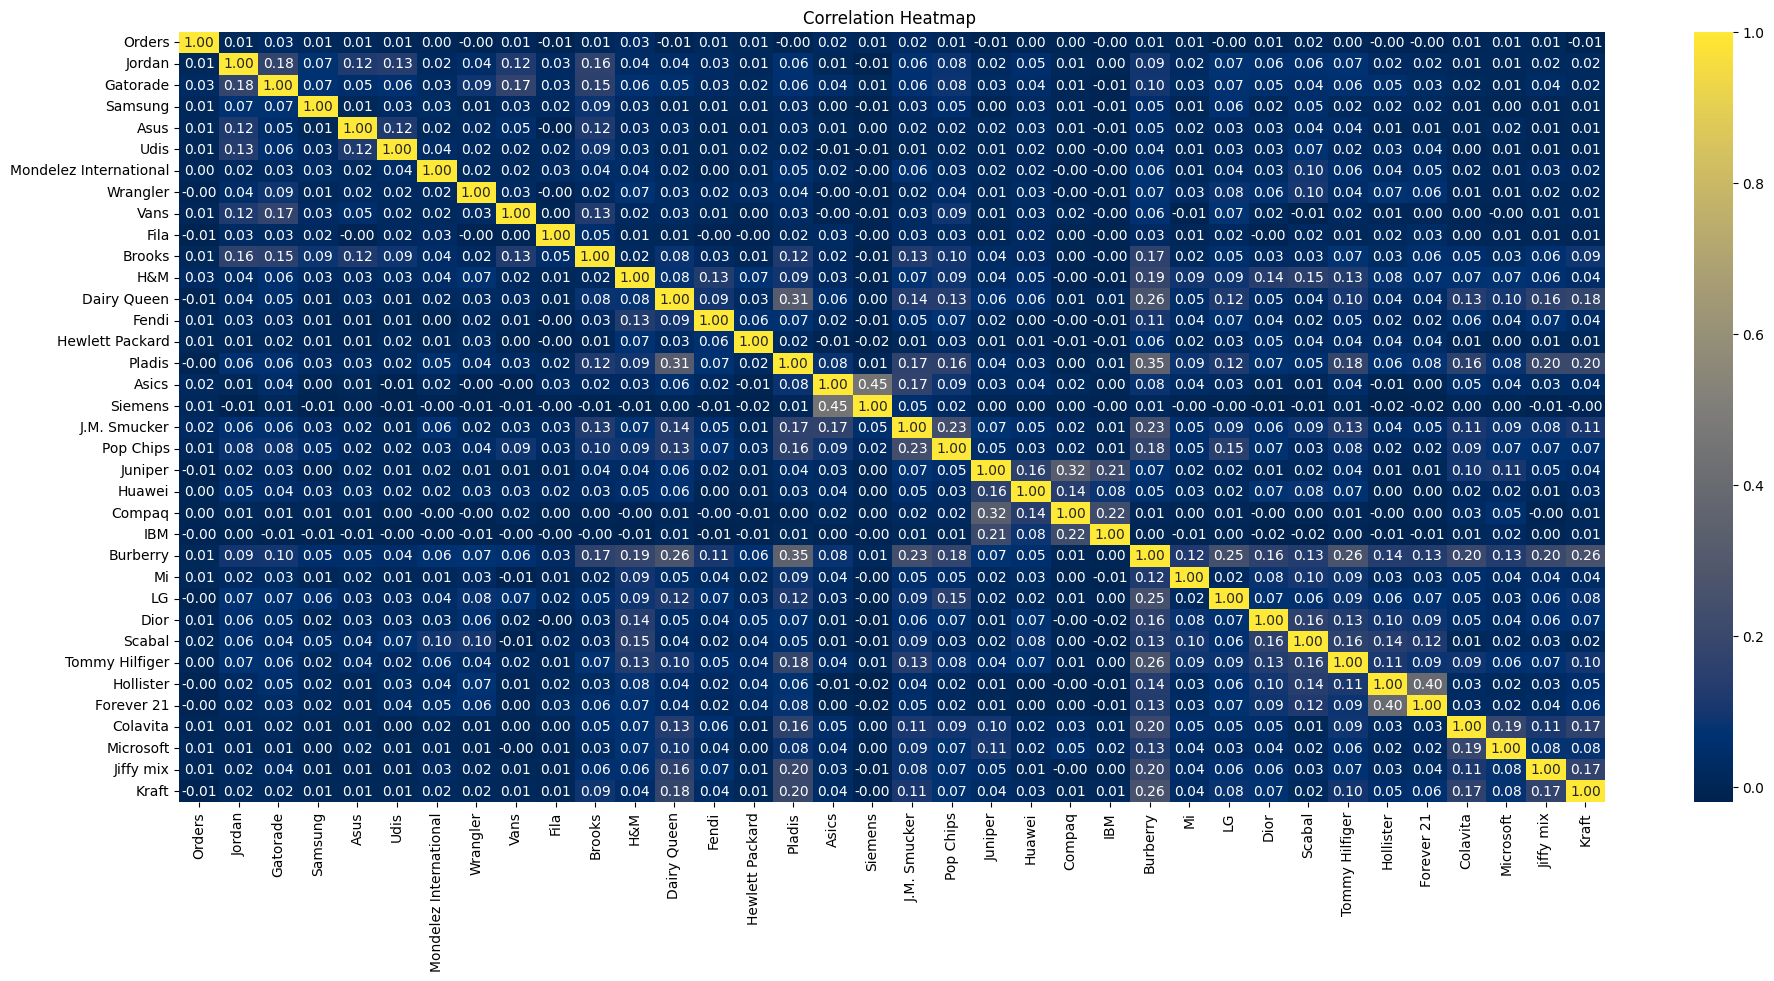

In [117]:
plt.figure(figsize=(23,10))
sns.heatmap(data1.drop(columns=['Cust_ID','Gender']).corr(),annot=True,cmap='cividis',fmt='.2f')
plt.title('Correlation Heatmap ')
plt.show()


In [ ]:

numerical_columns = data1.drop(columns=['Cust_ID', 'Gender']).columns


plt.figure(figsize=(30, 30))


for i, col in enumerate(numerical_columns):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

### 4.Data Preprocessing
I encoded the Gender column using one-hot encoding, keeping only the "Male" category and dropping "Female." Then, I converted all values to integers for consistency.

I used StandardScaler to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1. 

In [53]:
# Encoding the categorical variables

data1 = pd.get_dummies(data1,columns=['Gender'], drop_first=True)
data1 = data1.astype(int)


In [54]:
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [55]:
# Standardicing Data:

scaler=StandardScaler()
data_numerical = data1.drop(columns=['Cust_ID','Gender_M']).columns
data1[data_numerical] = scaler.fit_transform(data1[data_numerical])


In [56]:
data1.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M
0,1,0.769488,-0.338643,-0.365376,-0.245906,-0.222324,-0.224761,-0.268186,-0.209144,3.405184,...,-0.380912,-0.495568,-0.315652,-0.202524,-0.191534,-0.308395,-0.263661,-0.223605,-0.183886,1
1,2,-1.185404,-0.338643,1.024969,-0.245906,-0.222324,-0.224761,-0.268186,-0.209144,-0.206357,...,1.014999,-0.495568,-0.315652,-0.202524,-0.191534,-0.308395,-0.263661,-0.223605,-0.183886,0
2,3,0.769488,-0.338643,1.024969,-0.245906,-0.222324,-0.224761,-0.268186,-0.209144,-0.206357,...,-0.380912,-0.495568,-0.315652,-0.202524,-0.191534,-0.308395,1.921579,-0.223605,-0.183886,1
3,4,-1.185404,-0.338643,-0.365376,-0.245906,-0.222324,-0.224761,-0.268186,-0.209144,-0.206357,...,-0.380912,-0.495568,-0.315652,-0.202524,-0.191534,-0.308395,-0.263661,-0.223605,-0.183886,0
4,6,-0.068323,-0.338643,-0.365376,-0.245906,-0.222324,-0.224761,-0.268186,-0.209144,-0.206357,...,-0.380912,0.819711,-0.315652,-0.202524,-0.191534,-0.308395,-0.263661,2.244648,-0.183886,0


In [57]:
Data = data1.copy()

In [58]:
# save the cleaned data
import os
file_name ='e-comm_encoded_data_final'
file_path = os.path.join('C:/Users/ELCOT/Downloads/data_prac',file_name)
Data.to_csv(file_path, index=False)

In [ ]:
scaled_features=pd.read_csv('C:/Users/ELCOT/Downloads/data_prac/e-comm_encoded_data_final')
print(scaled_features.head())

   Cust_ID    Orders    Jordan  Gatorade   Samsung      Asus      Udis  \
0        1  0.769488 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
1        2 -1.185404 -0.338643  1.024969 -0.245906 -0.222324 -0.224761   
2        3  0.769488 -0.338643  1.024969 -0.245906 -0.222324 -0.224761   
3        4 -1.185404 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
4        6 -0.068323 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   

   Mondelez International  Wrangler      Vans  ...      Dior    Scabal  \
0               -0.268186 -0.209144  3.405184  ... -0.380912 -0.495568   
1               -0.268186 -0.209144 -0.206357  ...  1.014999 -0.495568   
2               -0.268186 -0.209144 -0.206357  ... -0.380912 -0.495568   
3               -0.268186 -0.209144 -0.206357  ... -0.380912 -0.495568   
4               -0.268186 -0.209144 -0.206357  ... -0.380912  0.819711   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0       -0.315652  -0.202524   -0.

In [ ]:
scaled_features.shape

(27276, 38)

In [80]:
scaled_features.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft',
       'Gender_M'],
      dtype='object')

# Elbow Method for Determining Optimal Clusters

I used the Elbow Method to determine the optimal number of clusters for KMeans by plotting the Within-Cluster Sum of Squares (WCSS) for different values of 'k'. 

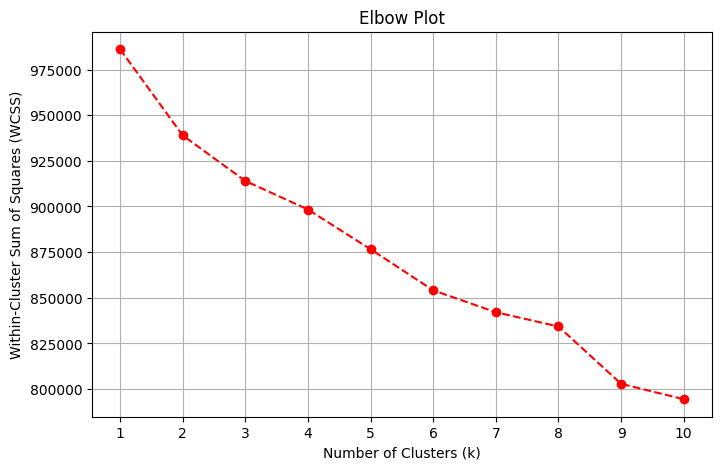

In [81]:

features_for_clustering = scaled_features.drop(columns=['Cust_ID'])

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='r')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()



# Silhouette Score for Cluster Evaluation

I evaluated the clustering performance using the Silhouette Score for different values of 'k'. The highest score of 0.40 was achieved when k=2, indicating that two clusters provide the best separation and compactness. Therefore, I decided to use k=2 for the final clustering.

In [82]:
for k in range(2, 10):  # Try different cluster numbers
    kmeans = KMeans(n_clusters=k, random_state=10)
    clusters = kmeans.fit_predict(features_for_clustering)
    silhouette_avg = silhouette_score(features_for_clustering, clusters)
    print(f"For k={k}, the Silhouette Score is {silhouette_avg:.4f}")


For k=2, the Silhouette Score is 0.4083
For k=3, the Silhouette Score is 0.2714
For k=4, the Silhouette Score is 0.2526
For k=5, the Silhouette Score is 0.2441
For k=6, the Silhouette Score is 0.2372
For k=7, the Silhouette Score is 0.2384
For k=8, the Silhouette Score is 0.1154
For k=9, the Silhouette Score is 0.1816


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=10)

clusters = kmeans.fit_predict(features_for_clustering)

features_for_clustering['Cluster'] = clusters
scaled_features['Cluster'] = clusters

# Cluster Size Distribution

The count plot reveals that Cluster 0 contains 3,042 customers, while Cluster 1 contains 24,234 customers. This shows a significant imbalance in the cluster sizes, with Cluster 1 having a much larger number of customers compared to Cluster 0. The majority of customers fall into Cluster 1, indicating that this cluster likely represents a more general or common behavior pattern, while Cluster 0 may represent a smaller, more specific segment of customers.

In [84]:
scaled_features['Cluster'] = clusters

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_13944\3788912471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis, x='Cluster', palette=['darkred', 'green'])


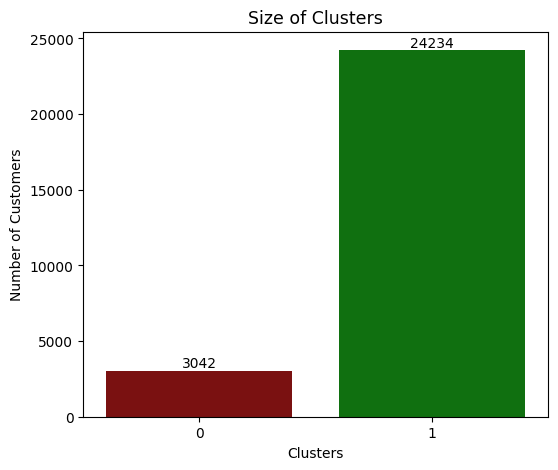

In [85]:
cluster_analysis = scaled_features[['Cust_ID', 'Cluster']]
plt.figure(figsize=(6, 5))
sns.countplot(data=cluster_analysis, x='Cluster', palette=['darkred', 'green'])

plt.title('Size of Clusters', fontsize=12.5)
plt.xlabel('Clusters')
plt.ylabel('Number of Customers')

cluster = cluster_analysis['Cluster'].value_counts().sort_index(ascending=True)

for i, count in enumerate(cluster):
    plt.text(i, count, str(count), va='bottom', ha='center', color='black')

plt.show()


# Cluster Centers Analysis

The cluster centers represent the mean values of the features for each cluster, providing insights into the characteristics of the customers in each group. By analyzing the cluster centers, we can understand the typical behavior or preferences of customers within each cluster based on the features like Orders, Gender_M, and the various brands they have searched for (e.g., Jordan, Gatorade, Samsung, etc.).

In [88]:
kmeans.cluster_centers_

array([[ 0.05591958,  0.50283775,  0.47850135,  0.27719443,  0.24312829,
         0.29319949,  0.32731339,  0.36066232,  0.27530053,  0.14044732,
         0.54799753,  0.81039558,  0.78384761,  0.48888264,  0.28055906,
         1.0592695 ,  0.39464467,  0.11132181,  0.76779996,  0.74514015,
         0.4520919 ,  0.44953689,  0.26607392,  0.11151427,  1.44086114,
         0.48982363,  0.75936388,  0.8345561 ,  0.6565953 ,  0.98935388,
         0.65155298,  0.67807881,  0.72292976,  0.52784303,  0.7619146 ,
         0.79718847,  0.09678478],
       [-0.00703496, -0.06325943, -0.06019779, -0.0348724 , -0.03058672,
        -0.03688592, -0.04117761, -0.04537307, -0.03463414, -0.01766895,
        -0.06894075, -0.1019517 , -0.09861183, -0.06150381, -0.03529569,
        -0.13326124, -0.04964821, -0.01400482, -0.09659296, -0.09374225,
        -0.05687536, -0.05655392, -0.03347339, -0.01402904, -0.18126733,
        -0.06162219, -0.09553166, -0.10499121, -0.08260288, -0.12446552,
        -0.08196

In [96]:
features_for_clustering.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Cluster'],
      dtype='object')

In [ ]:

feature_names = ['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M'] 

cluster_centers = kmeans.cluster_centers_

cluster_centers_df = pd.DataFrame(cluster_centers, columns=feature_names)



In [98]:
cluster_centers_df

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M
0,0.055920,0.502838,0.478501,0.277194,0.243128,0.293199,0.327313,0.360662,0.275301,0.140447,...,0.834556,0.656595,0.989354,0.651553,0.678079,0.722930,0.527843,0.761915,0.797188,0.096785
1,-0.007035,-0.063259,-0.060198,-0.034872,-0.030587,-0.036886,-0.041178,-0.045373,-0.034634,-0.017669,...,-0.104991,-0.082603,-0.124466,-0.081969,-0.085306,-0.090948,-0.066405,-0.095853,-0.100290,0.203360


# Cluster 1 (Cluster 0)

Orders: 
Customers in this cluster have a moderate level of engagement, with a positive orders value of 0.05, indicating occasional purchasing behavior.

Brand Preferences:
 They show a strong preference for Jordan (0.50) and Gatorade (0.48), which are their most frequently purchased brands.

Gender Distribution:
 9% of customers in this cluster are male (Gender_M = 0.09) and 91% are female.

Interpretation:

Cluster 1 represents customers who make moderate purchases and are particularly engaged with popular sports and beverage brands. They tend to prefer mainstream brands like Jordan and Gatorade, but their overall purchasing frequency is relatively low. This cluster can be targeted with promotions for these brands to further boost engagement.

# Cluster 2 (Cluster 1)

Orders:
 Customers in this cluster have lower engagement with an orders value of -0.01, indicating very few or occasional purchases.

Brand Preferences:
 The engagement with brands like Jordan and Gatorade is also low, with negative values of -0.06, suggesting minimal purchases.

Gender Distribution:
 A significant portion (80%) of customers in this cluster are Female (Gender_M = 0.20), which is notably lower than Cluster 1.

Interpretation:

Cluster 2 represents a group of customers who are less engaged with the brands and have fewer purchases overall. The higher percentage of male customers in this group may suggest that their preferences differ from the rest, and targeted marketing or specific promotions may be needed to increase engagement.

# Comparative Summary of Clusters

Cluster 1 consists of customers who are moderately engaged, purchasing Jordan and Gatorade products, and are relatively balanced in terms of gender distribution.

Cluster 2 consists of customers who show low engagement with all brands and have fewer purchases. The cluster has a much higher percentage of male customers, indicating a possible different purchasing pattern that could be addressed with tailored marketing efforts.

# Business Implications

Understanding these clusters can guide your marketing strategy:

For Cluster 1, which is engaged with brands like Jordan and Gatorade, you could focus on personalized offers or advertisements that highlight these products to enhance customer loyalty.

For Cluster 2, you may want to explore targeted campaigns to increase their overall engagement and purchases. Additionally, considering the high percentage of male customers, tailoring offers based on male preferences might yield better results.

By leveraging these insights, we can develop more effective marketing campaigns and product strategies for each customer segment, maximizing overall customer satisfaction and revenue.